(8, 3)


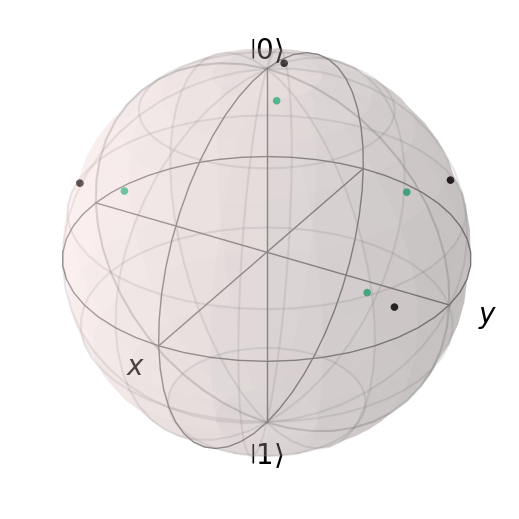

In [23]:

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate
dataset='amazon'
threshold = .115
ours = np.load(f'../../bloch_vector_test.npy')



H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect
b = Bloch()
colors = []
ours = [ours[i] for i in range(ours.shape[0]) if i!=3]
for i in range(len(ours)):
    colors.append('#000000')
#b.add_points([[i[0] for i in ours], [i[1] for i in ours], [i[2] for i in ours]], "m")
ours2 = np.load(f'../../bloch_vector_test_noisy.npy')
ours2 = [ours2[i] for i in range(ours2.shape[0]) if i!=3]
ours = np.concatenate([ours, ours2])
print(ours.shape)
for i in range(len(ours)):
    colors.append('#26C485')

b.add_points([[i[0] for i in ours], [i[1] for i in ours], [i[2] for i in ours]], "m")

b.point_color = list(colors)

b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()
b.save('bloch_0.png')


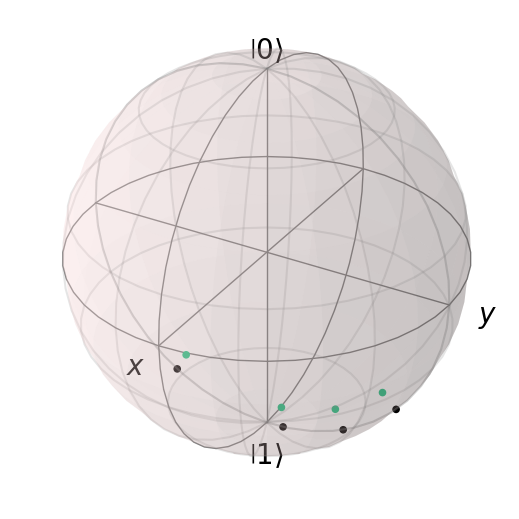

In [25]:

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate
dataset='amazon'
ours = np.load(f'../../bloch_vector_test_simple.npy')
ours = [ours[i] for i in range(ours.shape[0]) if i!=0]

ours_noisy = np.load(f'../../bloch_vector_test_noisy_simple.npy')
ours_noisy = [ours_noisy[i] for i in range(ours_noisy.shape[0]) if i!=0]

H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect
b = Bloch()
colors = []
for i in range(len(ours)):
    colors.append('#000000')
for i in range(len(ours)):
    colors.append('#26C485')
ours = np.concatenate([ours, ours_noisy])
b.add_points([[i[0] for i in ours], [i[1] for i in ours], [i[2] for i in ours]], "m")
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()
b.save('bloch_2.png')


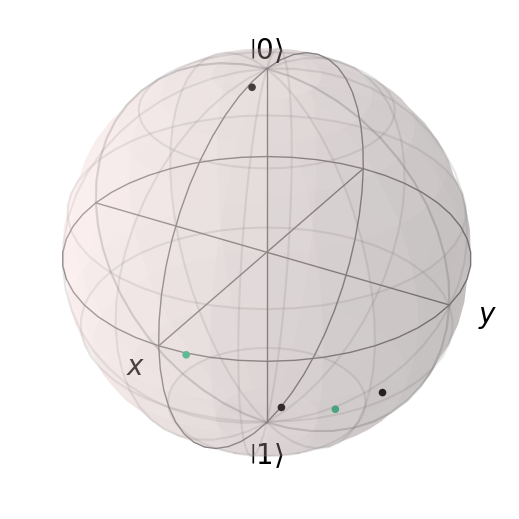

In [4]:

import matplotlib as mpl
import numpy as np
from matplotlib import cm
from qutip import Bloch, about, basis, destroy, sesolve, sigmax, sigmay, sigmaz
delta = 0.5 * 2 * np.pi
v = 2.0 * 2 * np.pi  # sweep rate
dataset='amazon'
ours = np.load(f'../../bloch_vector_test_noisy_simple.npy')
dists = list(np.load(f'../../bloch_vector_test_dist_simple.npy'))


H0 = delta / 2.0 * sigmax()
H1 = v / 2.0 * sigmaz()
H = [H0, [H1, "t"]]
psi0 = basis(2, 0)

sm = destroy(2)
sx = sigmax()
sy = sigmay()
sz = sigmaz()
expt_ops = [sm.dag() * sm, sx, sy, sz]


tlist = np.linspace(-10.0, 10.0, 500)
expt_list = sesolve(H, psi0, tlist, expt_ops).expect
b = Bloch()
colors = []
for i in range(len(dists)):
    if dists[i] <=threshold:
        colors.append('#000000')
    else:
        colors.append('#26C485')
b.add_points([[i[0] for i in ours], [i[1] for i in ours], [i[2] for i in ours]], "m")
#colors=['#26C485']
b.point_color = list(colors)
b.point_marker = ["o"]
b.point_size = [20]

b.zlpos = [1.1, -1.2]

b.show()
b.save('bloch_3.png')

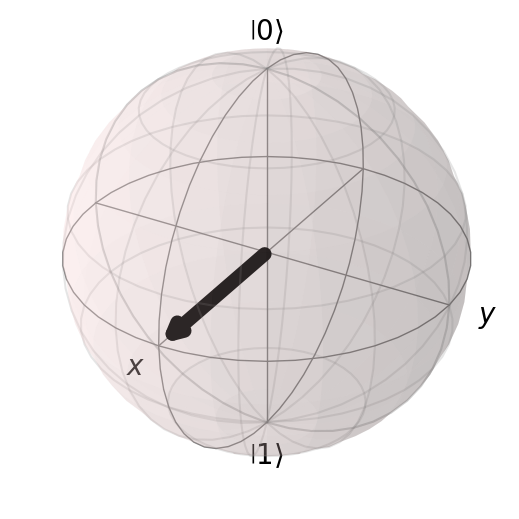

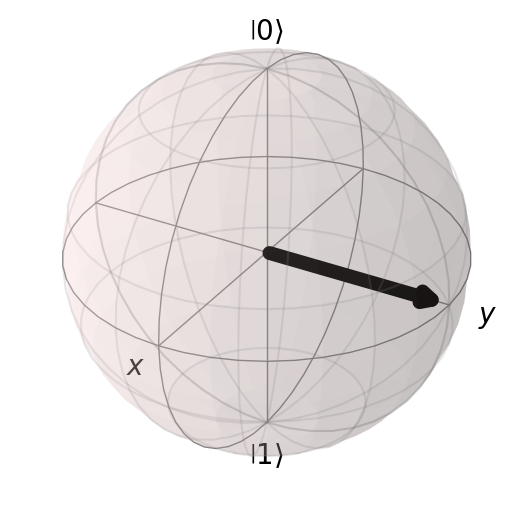

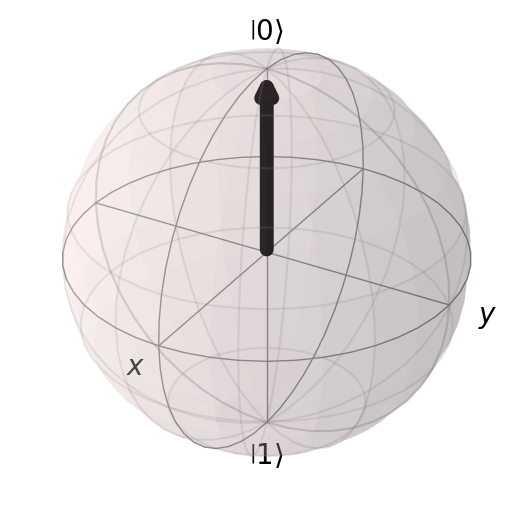

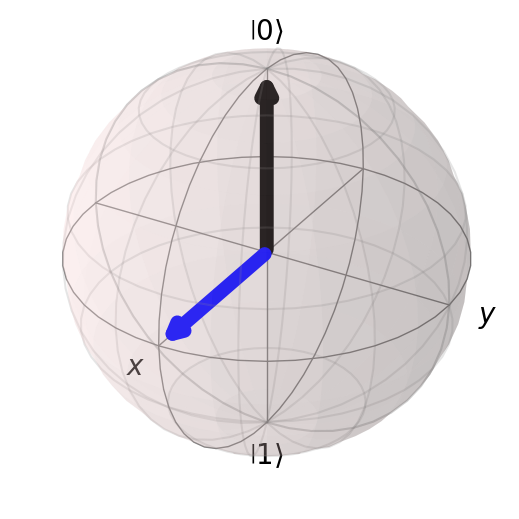

In [8]:
x = (basis(2,0)+(1+0j)*basis(2,1)).unit()
y = (basis(2,0)+(0+1j)*basis(2,1)).unit()
z = (basis(2,0)+(0+0j)*basis(2,1)).unit()


b = Bloch()
b.add_states([x])
b.vector_color = ['#000000']
b.vector_width = 10
b.show()
b.save('bloch_4.png')


b = Bloch()
b.add_states([y])
b.vector_color = ['#000000']
b.vector_width = 10
b.show()
b.save('bloch_5.png')


b = Bloch()
b.add_states([z])
b.vector_color = ['#000000']
b.vector_width = 10
b.show()
b.save('bloch_6.png')


b = Bloch()
b.add_states([z])
b.add_states([x])
b.vector_color = ['#000000', 'blue']
b.vector_width = 10
b.show()
b.save('bloch_7.png')
